### Amit Anand
### McDonalds Case Study

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("dataset.csv")
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,Once a month,Male


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [4]:
df['VisitFrequency'].value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

In [5]:
df['yummy'].value_counts()

Yes    803
No     650
Name: yummy, dtype: int64

In [6]:
df['Gender'].value_counts()

Female    788
Male      665
Name: Gender, dtype: int64

In [7]:
df.shape

(1453, 15)

In [8]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1453.0,44.604955,14.221178,18.0,33.0,45.0,57.0,71.0


In [10]:
df.shape

(1453, 15)

In [11]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [12]:
namelist = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap','tasty', 'expensive', 'healthy', 'disgusting']
col = {"No":0,"Yes":1}
for i in namelist:
  df[i]=df[i].map(col)

In [13]:
col1 = {'Female':0,'Male':1}
df.Gender = df.Gender.map(col1)

In [14]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,Every three months,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,Every three months,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,Once a week,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,Once a month,1


In [15]:
df.Like = df.Like.str.replace('-','')
df.Like = df.Like.str.replace('+','')
df.Like = df.Like.str.replace('I hate it!','')
df.Like = df.Like.str.replace('I love it!','')
df.Like = pd.to_numeric(df.Like)

C:\Users\amit0\AppData\Local\Temp\ipykernel_7604\618027685.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.Like = df.Like.str.replace('+','')


In [16]:
df.VisitFrequency.unique()

array(['Every three months', 'Once a week', 'Once a month', 'Once a year',
       'More than once a week', 'Never'], dtype=object)

In [17]:
#Here i encoded 'never' and 'once a year' as 0 because the both impact less for segment  
df.VisitFrequency= df.VisitFrequency.map({'Every three months' :1, 'Once a week':3, 'Once a month':2, 'Once a year':0,'More than once a week':4, 'Never':0})

In [18]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,3,61,1,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,1,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,1,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,3,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,2,1


In [19]:
df.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946,2.757743,44.604955,1.473503,0.457674
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010,1.645749,14.221178,1.150587,0.498377
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,33.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,45.000000,2.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,57.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,71.000000,4.000000,1.000000


<AxesSubplot:title={'center':'Age Distribution'}, xlabel='Age', ylabel='Density'>

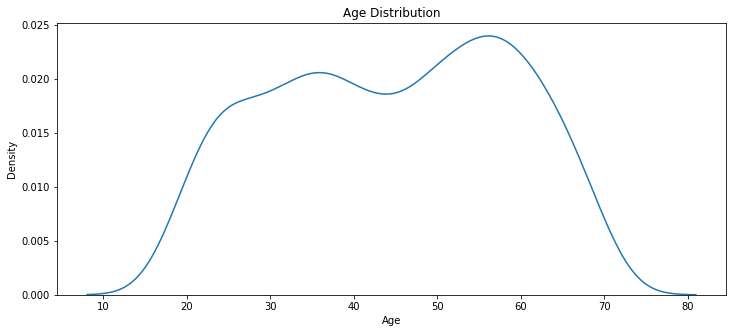

In [20]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(12, 5)) # step 4

ax1.set_title('Age Distribution')
sns.kdeplot(df['Age'], ax=ax1)

<AxesSubplot:title={'center':'Like Distribution'}, xlabel='Like', ylabel='Density'>

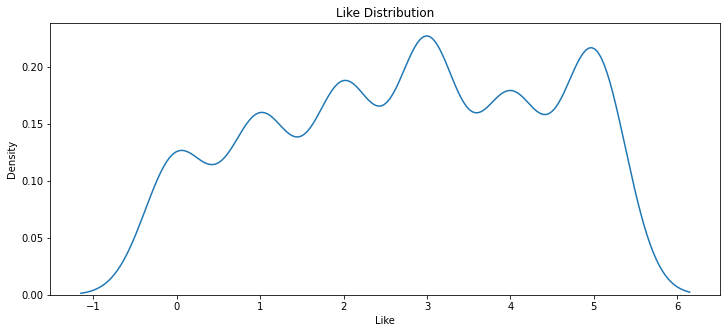

In [21]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(12, 5)) # step 4

ax1.set_title('Like Distribution')
sns.kdeplot(df['Like'], ax=ax1)

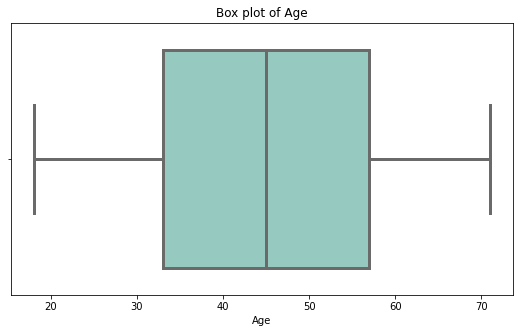

In [22]:
plt.figure(figsize=(9,5))
plt.title("Box plot of Age")
sns.boxplot(x = df['Age'],palette="Set3",linewidth=3) # step 4
plt.show()

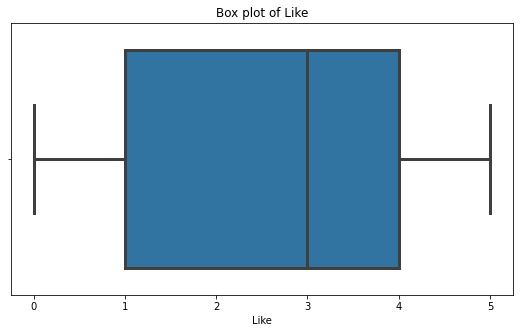

In [23]:
plt.figure(figsize=(9,5))
plt.title("Box plot of Like")
sns.boxplot(x = 'Like',linewidth=3,data=df) # step 4
plt.show()

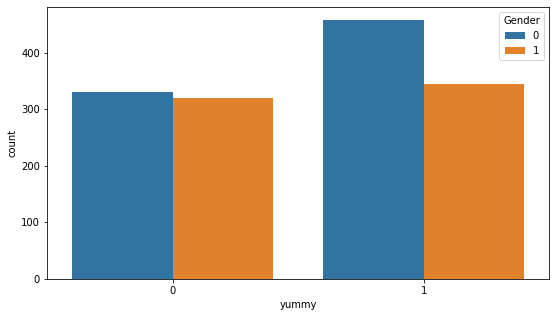

In [24]:

plt.figure(figsize=(9,5))
sns.countplot(x = 'yummy',hue='Gender',data=df) 
plt.show()

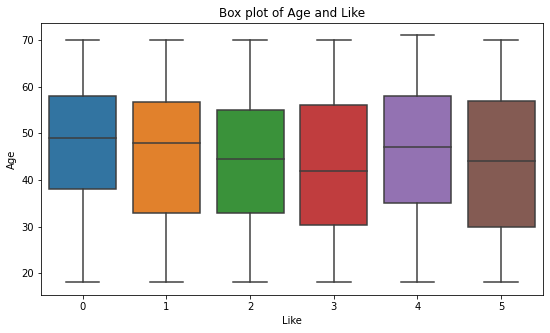

In [25]:
plt.figure(figsize=(9,5))
plt.title("Box plot of Age and Like")
sns.boxplot(x = 'Like',y='Age',data = df) # step 4
plt.show()

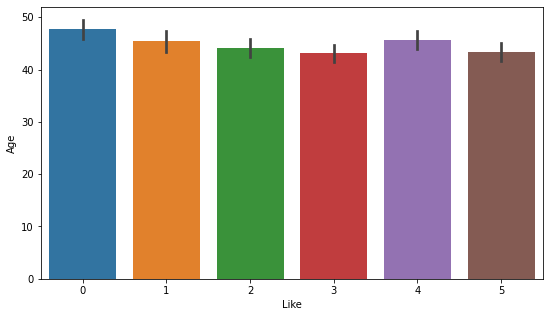

In [26]:
plt.figure(figsize=(9,5))
sns.barplot(x ='Like', y ='Age', data = df) # step 4
plt.show()


In [27]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

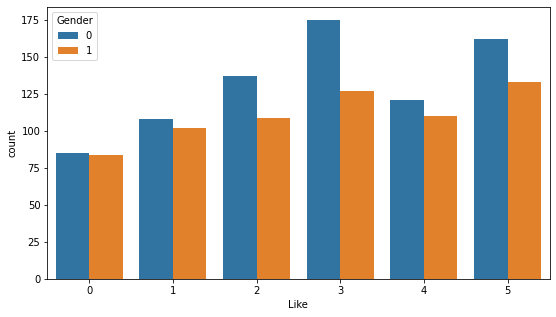

In [28]:
#Female:0 and Male:1
plt.figure(figsize=(9,5))
sns.countplot(x = 'Like',hue='Gender',data=df) # step 4
plt.show()

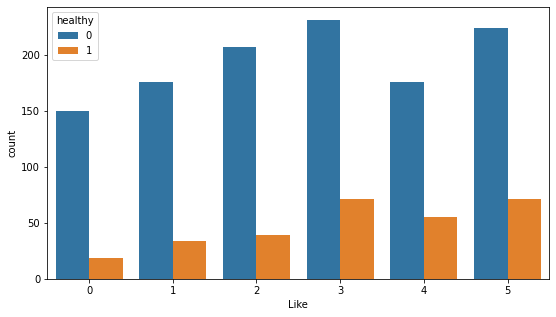

In [29]:
#no : 0 and yes : 1
plt.figure(figsize=(9,5))
sns.countplot(x = 'Like',hue='healthy',data=df) # step 4
plt.show()

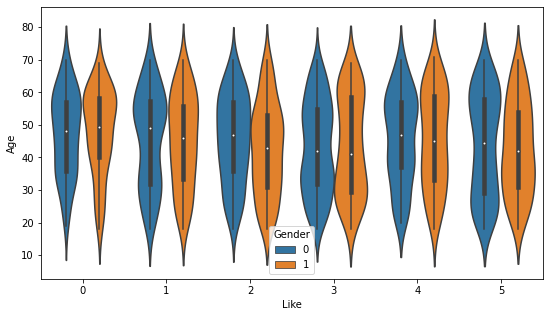

In [30]:
plt.figure(figsize=(9,5))
sns.violinplot(x='Like', y='Age', data=df, hue='Gender')# step 4
plt.show()

In [31]:
data = df.copy()

In [32]:
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,3,61,1,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,1,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,1,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,3,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,5,47,0,1
1449,1,1,0,1,0,0,1,1,0,1,0,2,36,3,0
1450,1,1,0,1,0,1,0,1,1,0,0,3,52,2,0
1451,1,1,0,0,0,1,1,1,0,1,0,4,41,1,1


In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(data)
data= pca.transform(data)
# data= pca.fit_transform(data)

In [34]:
data.shape

(1453, 10)

#neural gas clustering algorithm

# segment profile plot - The segment profile plot shows – for all segmentationvariables – how each market segment differs 
#from the overall sample

#panel plot
# Segment profile plot
#partykit
#mosaic plot ,step -7

In [35]:
##step-5
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42).fit(data)

In [36]:
kmeans.cluster_centers_

array([[-1.14908091e+01,  1.22506909e-01, -1.01267543e-01,
        -5.29482839e-02, -3.38519282e-03, -2.84975799e-02,
         6.14852502e-03, -1.45671187e-02, -7.46962548e-03,
        -1.54869243e-02],
       [ 9.56551617e+00, -2.98030498e-02, -3.09726408e-02,
         8.37104419e-03, -5.13499898e-02,  1.34559136e-02,
        -3.06065277e-02,  1.79874539e-02, -2.27877331e-02,
         1.33539695e-02],
       [ 2.05383559e+01, -1.03563515e-01, -2.28426320e-03,
        -8.68056603e-02,  3.37475016e-02, -1.56710137e-02,
         7.02837348e-02, -2.53771004e-02,  3.53036803e-02,
         1.71687621e-03],
       [-1.63802516e+00,  1.62492565e-01,  9.26363471e-02,
         1.62025409e-01,  4.09087429e-02,  2.89998488e-02,
        -8.79204747e-02,  1.40609868e-02, -2.59647562e-02,
        -1.29540284e-02],
       [-2.02092296e+01, -2.24614821e-01,  6.64014922e-02,
        -5.03271290e-02, -1.70172057e-02,  8.69660562e-04,
         6.89940684e-02,  6.45518672e-03,  3.58202689e-02,
         1.

In [37]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,3,61,1,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,1,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,1,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,3,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,5,47,0,1
1449,1,1,0,1,0,0,1,1,0,1,0,2,36,3,0
1450,1,1,0,1,0,1,0,1,1,0,0,3,52,2,0
1451,1,1,0,0,0,1,1,1,0,1,0,4,41,1,1


In [38]:
##step-5
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(df)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(df, KM_est.labels_)
    s_scores.append(silhouette_avg)

d:\Programs\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


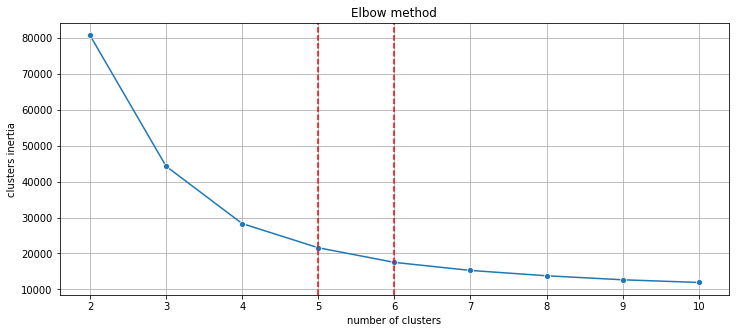

In [39]:
##step-5
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, clusters_inertia, marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("clusters inertia")
ax.axvline(5, ls="--", c="red")
ax.axvline(6, ls="--", c="red")
plt.grid()
plt.show()

In [40]:
##step-5
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42,init="k-means++")
kmeans.fit(df)

KMeans(n_clusters=5, random_state=42)

In [41]:
kmeans.cluster_centers_

array([[4.06666667e-01, 8.70000000e-01, 1.73333333e-01, 8.16666667e-01,
        4.20000000e-01, 9.10000000e-01, 6.43333333e-01, 5.26666667e-01,
        2.73333333e-01, 2.13333333e-01, 2.30000000e-01, 2.73000000e+00,
        6.35033333e+01, 1.00000000e+00, 4.60000000e-01],
       [6.89024390e-01, 9.20731707e-01, 3.96341463e-02, 9.05487805e-01,
        5.79268293e-01, 8.87195122e-01, 5.85365854e-01, 7.10365854e-01,
        3.93292683e-01, 2.13414634e-01, 2.37804878e-01, 2.84451220e+00,
        3.41189024e+01, 1.69512195e+00, 4.57317073e-01],
       [7.76422764e-01, 9.39024390e-01, 6.09756098e-02, 9.39024390e-01,
        7.60162602e-01, 9.43089431e-01, 6.46341463e-01, 8.13008130e-01,
        3.45528455e-01, 1.70731707e-01, 1.95121951e-01, 3.05691057e+00,
        2.35162602e+01, 1.95528455e+00, 4.71544715e-01],
       [4.88805970e-01, 9.10447761e-01, 9.32835821e-02, 8.54477612e-01,
        4.66417910e-01, 8.61940299e-01, 4.81343284e-01, 5.97014925e-01,
        4.66417910e-01, 2.05223881e-0

In [42]:
df['Clusters'] = kmeans.labels_

In [43]:
kmeans.fit_predict(df)

array([0, 3, 0, ..., 3, 4, 1])

In [44]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Clusters
0,0,1,0,1,0,1,1,0,1,0,0,3,61,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,1,0,4
2,0,1,1,1,1,1,0,1,1,1,0,1,62,1,0,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,3,0,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,5,47,0,1,3
1449,1,1,0,1,0,0,1,1,0,1,0,2,36,3,0,1
1450,1,1,0,1,0,1,0,1,1,0,0,3,52,2,0,4
1451,1,1,0,0,0,1,1,1,0,1,0,4,41,1,1,3


d:\Programs\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


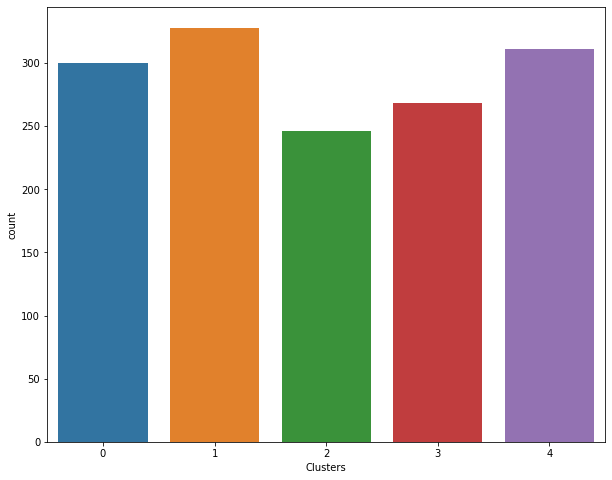

In [45]:
plt.figure(figsize=(10,8))
sns.countplot(df['Clusters'])
plt.show()

In [46]:
df.to_csv('new.csv')

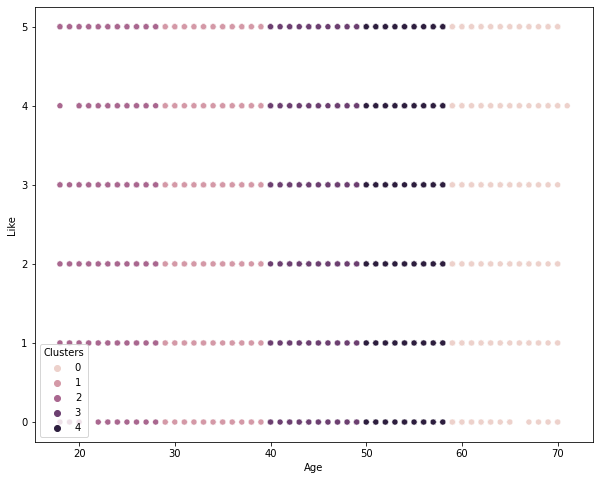

In [47]:
##step-5
plt.figure(figsize=(10,8))
sns.scatterplot(x='Age',y = 'Like',hue = 'Clusters',data = df)
plt.show()

## step-5

## using spectral clustering

In [48]:
from sklearn.cluster import SpectralClustering
spectral_model_nn = SpectralClustering(n_clusters = 5, affinity ='nearest_neighbors') 
labels_nn = spectral_model_nn.fit_predict(df)

d:\Programs\Python\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


d:\Programs\Python\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


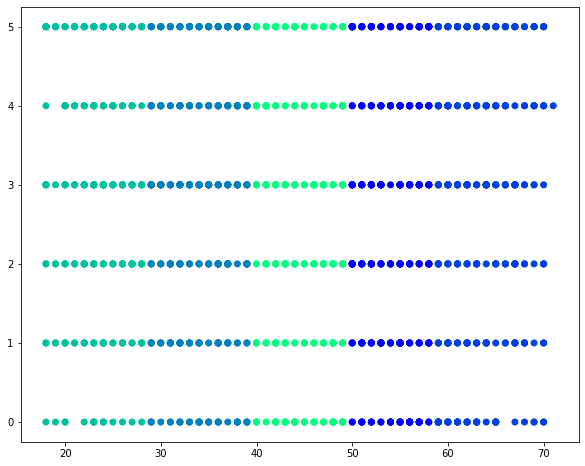

In [49]:
##step-5
plt.figure(figsize=(10,8))
plt.scatter(df['Age'], df['Like'], 
           c = SpectralClustering(n_clusters = 5, affinity ='nearest_neighbors') .fit_predict(df), cmap =plt.cm.winter)
plt.show()

## Dendogram

## step -5

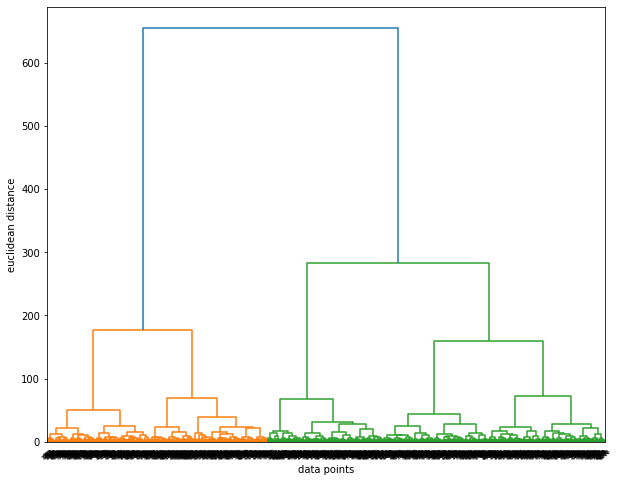

In [50]:
from scipy.cluster.hierarchy import linkage, dendrogram
merg = linkage(df,method="ward")
plt.figure(figsize=(10,8))
dendrogram(merg,leaf_rotation = 40)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

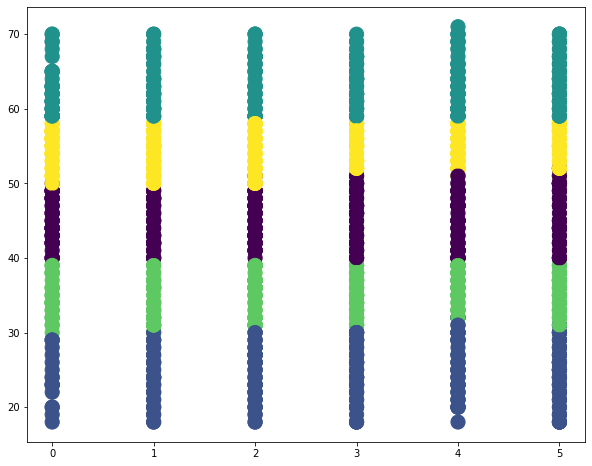

In [51]:
##step - 5
from sklearn.cluster import AgglomerativeClustering
hiyerartical_cluster = AgglomerativeClustering(n_clusters = 5,affinity= "euclidean",linkage = "ward")
data_predict = hiyerartical_cluster.fit_predict(df)
plt.figure(figsize=(10,8))
plt.scatter( x = 'Like' ,y = 'Age' , data = df , c = data_predict , s = 200 )
plt.show()

## visualizing using tree method

## step-7

In [52]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(df.iloc[:,0:-1].values,df['Clusters'].values)

DecisionTreeClassifier()

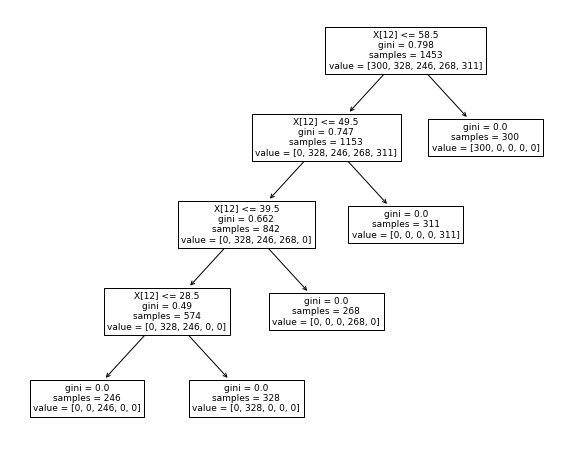

In [53]:
from sklearn import tree
plt.figure(figsize=(10,8))
tree.plot_tree(clf)
plt.show()